## Please find below the Project for Supervised Learning course. This is an individual assignment. Kindly submit it before it's deadline.

Data Set - http://www.stat.ufl.edu/~winner/data/airq402.dat

Data Description - http://www.stat.ufl.edu/~winner/data/airq402.txt

In [1]:
""" Importing all the utils """
import pandas as pd
import numpy as np
import os, csv
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import *
from statsmodels.stats import *

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline

In [2]:
"""
* General utilty to convert .dat to .csv files.
* It creates a csv if the csv is not present & it returns a dataframe with the mentioned columns
* This notebook assumes jupter command is run when the dataset is present. if not configure the os path accordingly
"""

def convert_dat2csv(dat_file,csv_file):
    if(os.path.exists(os.path.join('', csv_file)) == False):
        dataset = open(os.path.join('', dat_file),'r')
        line = dataset.readline()
        while line:
            row = list(filter(None, line.split(" ")))
            row[-1] = row[-1].rstrip()
            if(os.path.exists(os.path.join('', csv_file)) == False):
                with open(csv_file, mode='w') as airline_file:
                    airline_writer = csv.writer(airline_file)
                    airline_writer.writerow(row)
            else:
                 with open(csv_file, mode='a') as airline_file:
                    airline_writer = csv.writer(airline_file)
                    airline_writer.writerow(row)
            line = dataset.readline()
        dataset.close()
    
    return pd.read_csv(os.path.join('', csv_file), header=None)

## 1. Import and store the data in a data frame. (2.5 points)

In [3]:
# Get the data from the data-set
df_airline = convert_dat2csv('airq402.dat','airq402.csv')
# http://users.stat.ufl.edu/~winner/data/airq402.txt
cols = ['City1','City2','Average Fare1','Distance','Average weekly passengers','market leading airline','market share1','Average fare2','Low price airline','market share2','price']
df_airline.columns = cols
df_airline.head()

,City1,City2,Average Fare1,Distance,Average weekly passengers,market leading airline,market share1,Average fare2,Low price airline,market share2,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [4]:
df_airline.describe()

,Average Fare1,Distance,Average weekly passengers,market share1,Average fare2,market share2,price
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,163.37542,1056.973000,672.279140,60.128590,166.64756,34.551480,143.193090
std,55.36547,643.203251,766.519254,19.367779,62.66014,27.096999,47.229184
min,50.52000,108.000000,181.410000,17.680000,50.52000,1.060000,49.610000
25%,125.97500,553.500000,257.197500,46.510000,124.08500,13.195000,113.767500
50%,161.34500,919.000000,404.780000,59.240000,161.40000,26.140000,137.825000
75%,197.39250,1452.500000,769.912500,73.510000,202.97750,52.972500,168.530000
max,401.23000,2724.000000,8950.760000,100.000000,490.03000,100.000000,387.940000


## 2.Remove the outliers from the data (5 points)

,Average Fare1,Distance,Average weekly passengers,market share1,Average fare2,market share2,price
0,114.47,528,424.56,70.19,111.03,70.19,111.03
1,122.47,860,276.84,75.10,123.09,17.23,118.94
2,214.42,852,215.76,78.89,223.98,2.77,167.12
3,69.40,288,606.84,96.97,68.86,96.97,68.86
4,158.13,723,313.04,39.79,161.36,15.34,145.42


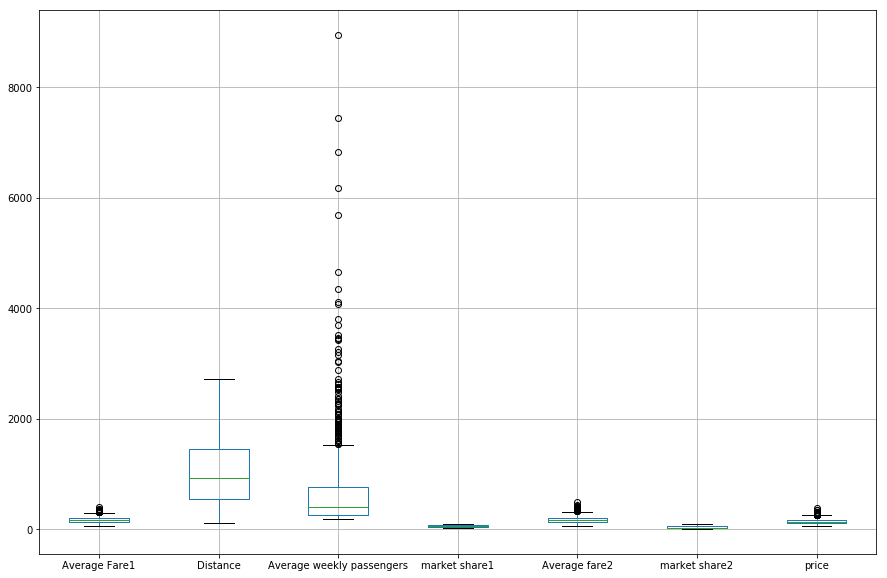

In [22]:
# getting just the numerical data
df_airline_numerical_data = airnum = df_airline.select_dtypes(np.number)
display(df_airline_numerical_data.head())

df_airline_numerical_data.boxplot(figsize=(15,10))

In [6]:
# Calculating the IQR 
Q1 = df_airline.quantile(0.25)
Q3 = df_airline.quantile(0.75)
IQR = Q3 - Q1
# Before Removing Outliers
display(df_airline_numerical_data.shape)
# Removing Outliers
df_airline_final = df_airline_numerical_data[~((df_airline_numerical_data < (Q1 - 1.5*IQR) )|(df_airline_numerical_data > (Q3 + 1.5*IQR))).any(axis=1)]
# After Removing Outliers
display(df_airline_final.shape)

(1000, 7)

(885, 7)

## 3. Treat “Average Fare” – 3rdColumn as your Dependent Variable and Rest of the columns as Independent Variable. (2.5 points)

In [7]:
#Independent Variables.'Average Fare' -3rd Col is dependent variable , so drop it
df_airline_x = df_airline_final.drop(['Average Fare1'], axis=1)
display(df_airline_x.head())
display(df_airline_x.shape)

#Dependent Variables.Only Average Fare - 3rd Col.
df_airline_y = df_airline_final[['Average Fare1']]
display(df_airline_y.head())
display(df_airline_y.shape)

,Distance,Average weekly passengers,market share1,Average fare2,market share2,price
0,528,424.56,70.19,111.03,70.19,111.03
1,860,276.84,75.10,123.09,17.23,118.94
2,852,215.76,78.89,223.98,2.77,167.12
3,288,606.84,96.97,68.86,96.97,68.86
4,723,313.04,39.79,161.36,15.34,145.42


(885, 6)

,Average Fare1
0,114.47
1,122.47
2,214.42
3,69.40
4,158.13


(885, 1)

## 4.Drop the independent variables which has less than 0.1 correlation with the dependent variable (5 points)

In [8]:
# Dropping independent variables which has less than 0.1 correlation with the dependent variable. 
for col in df_airline_x.columns.values:
    corr = float(df_airline_y.corrwith(df_airline_x[col]))
    if(corr < 0.1):
        df_airline_x.drop(col,inplace=True,axis=1)
df_airline_x.head()

,Distance,Average fare2,price
0,528,111.03,111.03
1,860,123.09,118.94
2,852,223.98,167.12
3,288,68.86,68.86
4,723,161.36,145.42


## 5. Create scatter Plot of Independent Variable vs Dependent Variable. (2.5 points)

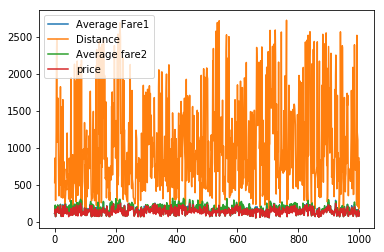

In [9]:
ax = df_airline_y.plot()
df_airline_x.plot(ax=ax)

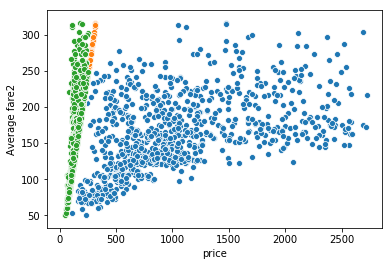

In [10]:
sns.scatterplot(x= "Distance", y="Average fare2",data=df_airline_x)
sns.scatterplot(x="Average fare2",y="Average fare2",data=df_airline_x)
sns.scatterplot(x="price",y="Average fare2",data=df_airline_x)

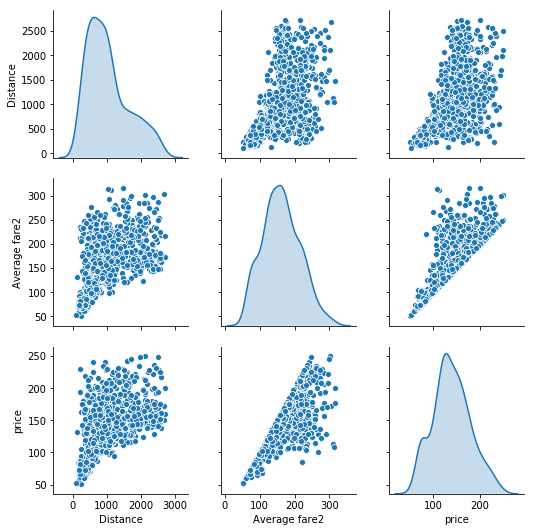

In [11]:
sns.pairplot(df_airline_x,diag_kind='kde')

## 6. Divide the data set into training and test data set and build a Multiple Linear Regression model. (5 points)

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(df_airline_x, df_airline_y, test_size=0.2, random_state= 40)

print('Training data size : {0} X {1}'.format(X_train.shape,Y_train.shape))
print('Testing data size : {0} X {1}'.format(X_test.shape,Y_test.shape))

Training data size : (708, 3) X (708, 1)
Testing data size : (177, 3) X (177, 1)


In [13]:
airline_regression_model = LinearRegression()
airline_regression_model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## 7. Print the coefficients & intercepts of the linear regression model (5 points)

In [14]:
# Intercept & Co-efficient for Training Data.
display(airline_regression_model.intercept_)
display(airline_regression_model.coef_)
display(airline_regression_model.score(X_train, Y_train))

array([6.31163628])

array([[0.00217354, 0.76495704, 0.19655618]])

0.9718167170614562

In [16]:
def linRegcheckModelPerformance(x, y, seed, size):
    model = LinearRegression()
    # Covert data into train and test
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=size, random_state = seed)
    # Build model with train data set
    model.fit(x_train, y_train)
    # Train accuracies
    trainR2 = model.score(x_train, y_train)
    predictedValues = model.predict(x_train)
    mse = metrics.mean_squared_error(predictedValues, y_train)
    trainRmse = np.sqrt(mse)
    trainRmsePct = trainRmse/np.mean(np.mean(np.array(y_train)))*100
    trainAdjR2 = AdjRsquare(model, x_train, y_train)
    trainAccuracies = [len(y_train), trainRmse, trainRmsePct, trainR2, trainAdjR2]
    # Test accuracies
    testR2 = model.score(x_test, y_test)
    predictedValues = model.predict(x_test)
    mse = metrics.mean_squared_error(predictedValues, y_test)
    testRmse = np.sqrt(mse)
    testRmsePct = testRmse/np.mean(np.mean(np.array(y_test)))*100
    testAdjR2 = AdjRsquare(model, x_test, y_test)
    testAccuracies = [len(y_test), testRmse, testRmsePct, testR2, testAdjR2]
    # Create dataframe for results
    resultsDf = pd.DataFrame(index = ["dataSize", "rmse", "rmsePct", "r2", "adjR2"])
    resultsDf['trainData'] = trainAccuracies
    resultsDf['testData'] = testAccuracies
    return ( round(resultsDf, 4))

## Adjusted R^2
def AdjRsquare(modelToBeTested, indData, target):
    Rsquare = modelToBeTested.score(indData, target)
    NoData = len(target)
    p = indData.shape[1]
    tempRsquare = 1 - (1-Rsquare)*(NoData-1)/(NoData - p - 1)
    return tempRsquare

In [17]:
linRegcheckModelPerformance(df_airline_x,df_airline_y,40,0.2)

,trainData,testData
dataSize,708.0000,177.0000
rmse,8.1178,8.7954
rmsePct,5.1380,5.1898
r2,0.9718,0.9660
adjR2,0.9717,0.9654


## 8. Print the accuracy of the overall model (2.5 points)

In [18]:
airline_test_predictions = airline_regression_model.predict(X_test)

Text(0, 0.5, 'Predicted Average Fare')

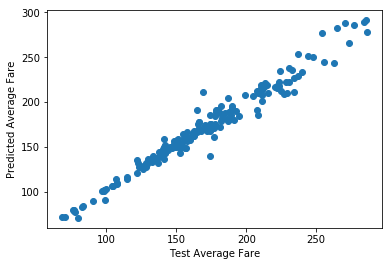

In [19]:
plt.scatter(Y_test,airline_test_predictions)
plt.xlabel('Test Average Fare')
plt.ylabel('Predicted Average Fare')